In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn
import baostock as bs
import warnings;warnings.simplefilter('ignore')#忽略警告
%matplotlib inline

In [3]:
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

login success!
login respond error_code:0
login respond  error_msg:success


In [4]:
zxzq = bs.query_history_k_data_plus('sh.600030',
"date,code,open,high,low,close,volume,turn,tradestatus,pctChg,isST,peTTM",
start_date='2019-01-01',end_date='2020-01-09',frequency='d',adjustflag='2'
)

In [5]:
#### 打印结果集 ####
data_list = []
while (zxzq.error_code == '0') & zxzq.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(zxzq.get_row_data())
result = pd.DataFrame(data_list, columns=zxzq.fields)

In [6]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
date           250 non-null object
code           250 non-null object
open           250 non-null object
high           250 non-null object
low            250 non-null object
close          250 non-null object
volume         250 non-null object
turn           250 non-null object
tradestatus    250 non-null object
pctChg         250 non-null object
isST           250 non-null object
peTTM          250 non-null object
dtypes: object(12)
memory usage: 23.5+ KB


In [7]:
def multiple_stocks(tickers):
    def data(ticker):
        stocks = bs.query_history_k_data_plus(ticker,
        "date,code,open,high,low,close,volume,turn,tradestatus,pctChg,isST,peTTM",
        start_date='2020-01-01',end_date='2020-02-18',adjustflag='2'
        )
        data_list = []
        while (stocks.error_code == '0') & stocks.next():
            # 获取一条记录，将记录合并在一起
            data_list.append(stocks.get_row_data())
        result = pd.DataFrame(data_list, columns=stocks.fields)
        result.date = pd.to_datetime(result.date)
        result.set_index('date',inplace=True)
        return result
    datas = map(data, tickers)
    return pd.concat(datas,keys=tickers,names=['Ticker'])

In [8]:
#test
tickers = ['sh.600030','sz.000001','sh.600426']
all_stocks = multiple_stocks(tickers)
all_stocks

code           open           high            low  \
Ticker    date                                                                 
sh.600030 2020-01-02  sh.600030  25.7400000000  25.8900000000  25.2600000000   
          2020-01-03  sh.600030  25.3400000000  25.6300000000  25.1000000000   
          2020-01-06  sh.600030  25.0600000000  25.8500000000  25.0000000000   
          2020-01-07  sh.600030  25.4000000000  25.7500000000  25.1000000000   
          2020-01-08  sh.600030  25.4300000000  25.4800000000  24.8500000000   
          2020-01-09  sh.600030  25.3300000000  25.5600000000  25.2100000000   
          2020-01-10  sh.600030  25.9600000000  26.0900000000  25.2100000000   
          2020-01-13  sh.600030  25.4500000000  25.9800000000  25.0300000000   
          2020-01-14  sh.600030  25.9800000000  26.1400000000  25.5100000000   
          2020-01-15  sh.600030  25.4000000000  25.5900000000  25.2000000000   
          2020-01-16  sh.600030  25.3600000000  25.3600000000  25.0600000000   
          2020-01-17  sh.600030  25.2700000000  25.7500000000  25.2300000000   
          2020-01-20  sh.600030  25.3400000000  25.7800000000  25.2000000000   
          2020-01-21  sh.600030  25.4700000000  25.6500000000  25.1100000000   
          2020-01-22  sh.600030  24.9800000000  25.4300000000  24.4200000000   
          2020-01-23  sh.600030  24.6900000000  24.8600000000  23.6200000000   
          2020-02-03  sh.600030  21.5100000000  21.5100000000  21.5100000000   
          2020-02-04  sh.600030  20.8000000000  21.9400000000  20.7800000000   
          2020-02-05  sh.600030  21.7600000000  22.6800000000  21.5200000000   
          2020-02-06  sh.600030  22.1000000000  22.7900000000  21.8200000000   
          2020-02-07  sh.600030  22.4800000000  22.6300000000  22.2000000000   
          2020-02-10  sh.600030  22.2000000000  22.8200000000  22.2000000000   
          2020-02-11  sh.600030  22.8300000000  23.1300000000  22.6400000000   
          2020-02-12  sh.600030  22.5100000000  23.0800000000  22.5000000000   
          2020-02-13  sh.600030  22.8200000000  23.0100000000  22.5000000000   
          2020-02-14  sh.600030  22.5000000000  23.2500000000  22.4700000000   
          2020-02-17  sh.600030  23.7500000000  24.2900000000  23.4000000000   
          2020-02-18  sh.600030  24.1800000000  24.2500000000  23.7200000000   
sz.000001 2020-01-02  sz.000001  16.6500000000  16.9500000000  16.5500000000   
          2020-01-03  sz.000001  16.9400000000  17.3100000000  16.9200000000   
...                         ...            ...            ...            ...   
          2020-02-17  sz.000001  15.0400000000  15.3700000000  14.9300000000   
          2020-02-18  sz.000001  15.3300000000  15.3300000000  15.0100000000   
sh.600426 2020-01-02  sh.600426  19.9300000000  20.8400000000  19.9300000000   
          2020-01-03  sh.600426  20.5300000000  20.9500000000  20.2500000000   
          2020-01-06  sh.600426  20.6500000000  21.3800000000  20.4000000000   
          2020-01-07  sh.600426  20.6100000000  20.8700000000  20.2000000000   
          2020-01-08  sh.600426  20.7100000000  21.5200000000  20.6000000000   
          2020-01-09  sh.600426  20.7600000000  21.0400000000  20.3800000000   
          2020-01-10  sh.600426  20.6800000000  20.9800000000  20.3200000000   
          2020-01-13  sh.600426  20.7700000000  21.1000000000  20.5500000000   
          2020-01-14  sh.600426  21.0200000000  21.2000000000  20.7600000000   
          2020-01-15  sh.600426  21.0500000000  21.1000000000  20.1800000000   
          2020-01-16  sh.600426  20.6900000000  21.2900000000  20.5000000000   
          2020-01-17  sh.600426  21.1300000000  21.2200000000  20.7000000000   
          2020-01-20  sh.600426  20.9400000000  21.0000000000  20.4600000000   
          2020-01-21  sh.600426  20.8500000000  20.8700000000  19.6800000000   
          2020-01-22  sh.600426  19.8500000000  20.2700000000  19.6100000000   
          2020-01-23  sh.60

In [11]:
#数据可视化
close_price = all_stocks[['close']].reset_index()
close_price.head()

,Ticker,date,close
0,sh.600030,2020-01-02,25.4900000000
1,sh.600030,2020-01-03,25.3800000000
2,sh.600030,2020-01-06,25.3200000000
3,sh.600030,2020-01-07,25.7000000000
4,sh.600030,2020-01-08,24.9400000000


In [12]:
close_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
Ticker    84 non-null object
date      84 non-null datetime64[ns]
close     84 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 2.0+ KB


In [21]:
#把所有股价信息显示再一张表格里：数据透视表
daily_close = close_price.pivot(index='date',columns='Ticker',values='close').astype(float)
daily_close.head()

Ticker,sh.600030,sh.600426,sz.000001
date,,,
2020-01-02,25.49,20.56,16.87
2020-01-03,25.38,20.52,17.18
2020-01-06,25.32,20.69,17.07
2020-01-07,25.70,20.59,17.15
2020-01-08,24.94,20.76,16.66


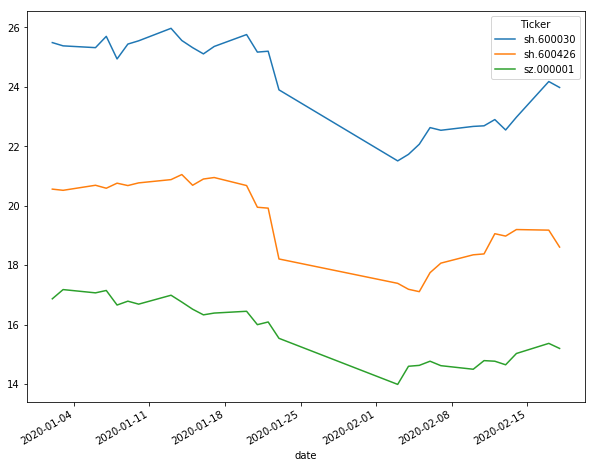

In [22]:
daily_close.plot(figsize=(10,8))